# 時系列解析用のモデル

## モデル
- MAモデル
- ARモデル
- ARMAモデル
- ARIMAモデル
- SARIMA

## 参考
- https://bigdata-tools.com/arima-sarima-model/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## MAモデル
移動平均モデル
N次MAモデル
$ x_t = \epsilon_t + \sum_{i=1}^N \theta_i \epsilon_{t-i} + c$

ただし，$ \epsilon_t \sim N(0, \sigma) $

1次MAモデルをplot

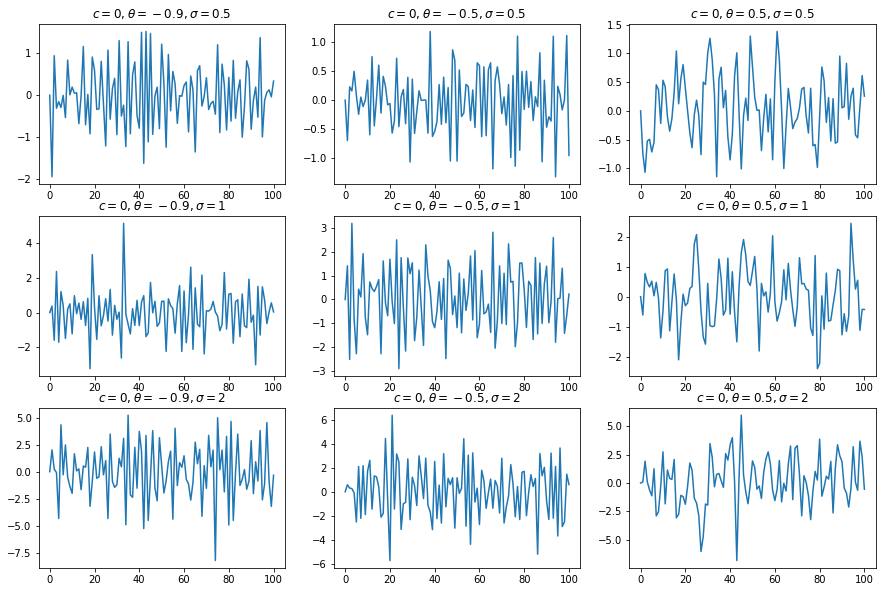

In [2]:
sigma_list = [0.5, 1, 2]
theta_list = [-0.9, -0.5, 0.5]
c = 0
sample_size = 100

fig = plt.figure(figsize=(15,10))

for k, sigma in enumerate(sigma_list):
    for j, theta in enumerate(theta_list):
        noise = np.random.normal(loc=0, scale=sigma, size=sample_size+1)
        y = np.zeros(sample_size+1)
        for i in range(sample_size):
            y[i+1] = noise[i+1] + theta*noise[i] + c
        
        ax = fig.add_subplot(3,3, 1+j+3*k)
        ax.plot(y)
        ax.set_title(f'$c = 0, \\theta = {theta}, \sigma = {sigma}$')

## ARモデル

線形自己回帰モデル

$ x_t = \sum_{i=1}^N a_i x_{t-i} + \epsilon_t $

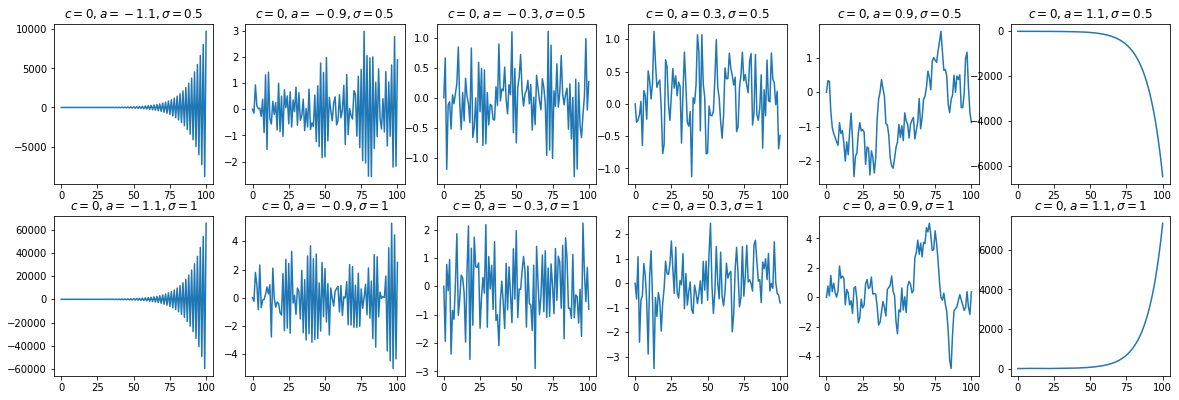

In [3]:
sigma_list = [0.5, 1]
a_list = [-1.1, -0.9, -0.3, 0.3, 0.9, 1.1]
c = 0
sample_size = 100

fig = plt.figure(figsize=(20,10))

for k, sigma in enumerate(sigma_list):
    for j, a in enumerate(a_list):
        noise = np.random.normal(loc=0, scale=sigma, size=sample_size+1)
        y = np.zeros(sample_size+1)
        for i in range(sample_size):
            y[i+1] = a*y[i] + noise[i+1] + c

        ax = fig.add_subplot(3,6, 1+j+6*k)
        ax.plot(y)
        ax.set_title(f'$c = 0, a = {a}, \sigma = {sigma}$')

$ |a| < 1 $で定常
$ |a| > 1 $で非定常

## ARMA
$ x_t =  \epsilon_t + \sum_{i=1}^N a_i x_{t-i} + \sum_{i=1}^M \theta_j \epsilon_{t-j} + c$
 $

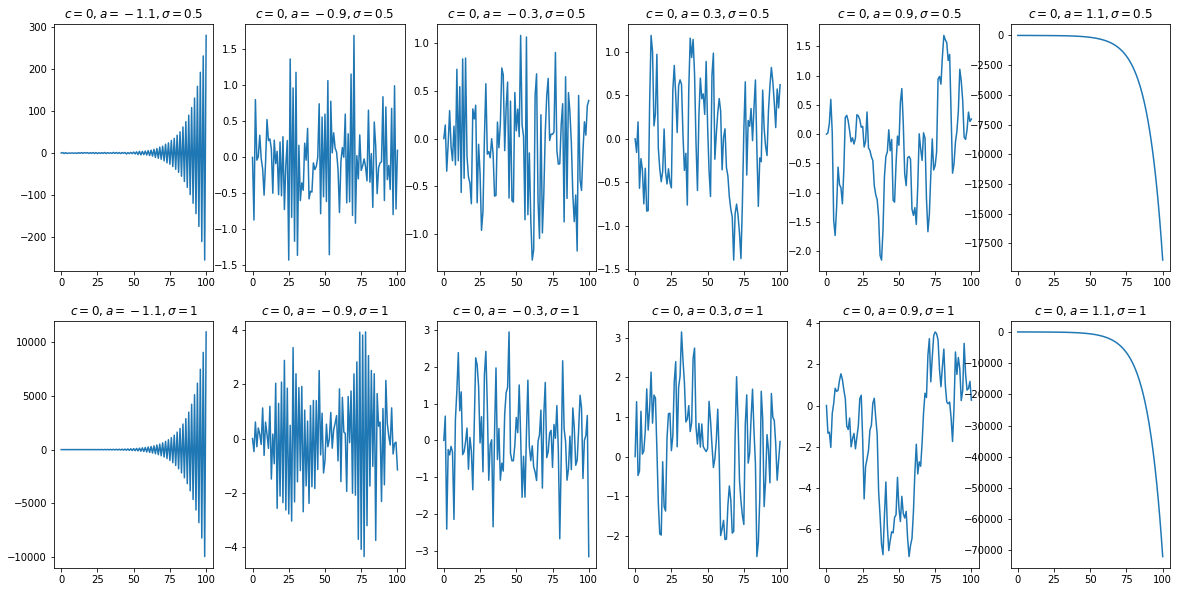

In [4]:
sigma_list = [0.5, 1]
a_list = [-1.1, -0.9, -0.3, 0.3, 0.9, 1.1]
theta = 0.4
c = 0
sample_size = 100

fig = plt.figure(figsize=(20,10))
arma_results = []
for k, sigma in enumerate(sigma_list):
    for j, a in enumerate(a_list):
        noise = np.random.normal(loc=0, scale=sigma, size=sample_size+1)
        y = np.zeros(sample_size+1)
        for i in range(sample_size):
            y[i+1] = a*y[i] + theta*noise[i] + noise[i+1] + c
        arma_results.append(y)
        ax = fig.add_subplot(2,6, 1+j+6*k)
        ax.plot(y)
        ax.set_title(f'$c = 0, a = {a}, \sigma = {sigma}$')

# 時系列データの予測


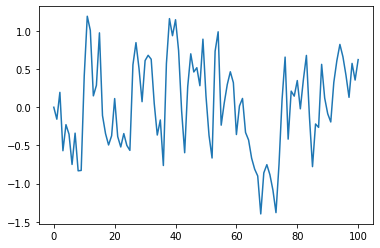

In [39]:
from statsmodels.graphics import tsaplots
arma_series = arma_results[3]
start = 71
end = 100
arma_train = arma_series[:start]
arma_test = arma_series[start:end+1]
plt.plot(arma_series)

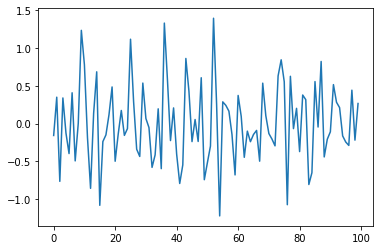

In [40]:
arma_series_diff = np.diff(arma_series)
plt.plot(arma_series_diff)

# 定常性


In [41]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

def display_adf_test(time_series, maxlag=0):
    adf, p_val, used_lag, user_observations, critical_values, icbest =  adfuller(time_series, maxlag=maxlag)
    print(f'test statistic: {adf}')
    print(f'p value: {p_val}')
    print(f'used lag: {used_lag}')
    print(f'observations used: {user_observations}')
    print(f'icbest: {icbest}')
    for key, val in critical_values.items():
        print(f'critical value({key}): {val}')

In [42]:
display_adf_test(arma_train)

test statistic: -3.966770574326303
p value: 0.001594862096832722
used lag: 0
observations used: 70
icbest: 101.30794172925044
critical value(1%): -3.5274258688046647
critical value(5%): -2.903810816326531
critical value(10%): -2.5893204081632653


定常的である．

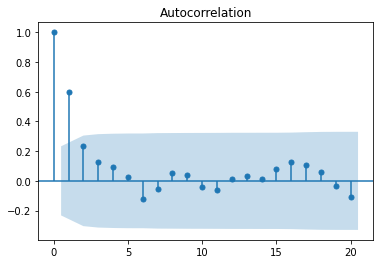

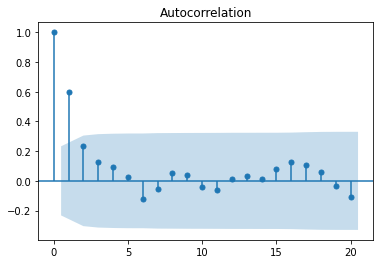

In [43]:
tsaplots.plot_acf(arma_train, lags=20)

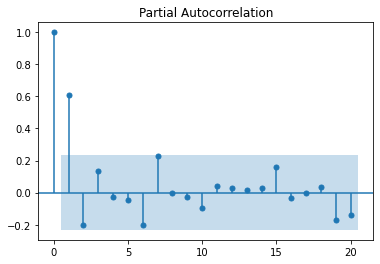

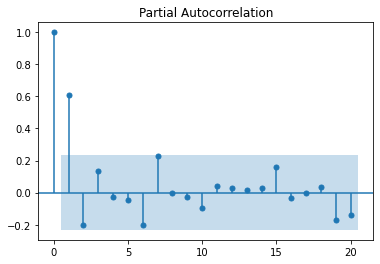

In [44]:
tsaplots.plot_pacf(arma_train, lags=20)

In [45]:

from statsmodels.tsa import arima_model

In [53]:
model = arima_model.ARIMA(arma_train, order=(4, 0, 2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   71
Model:                     ARMA(4, 2)   Log Likelihood                 -45.815
Method:                       css-mle   S.D. of innovations              0.458
Date:                Fri, 18 Dec 2020   AIC                            107.630
Time:                        10:07:33   BIC                            125.731
Sample:                             0   HQIC                           114.828
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0080      0.137      0.058      0.954      -0.260       0.276
ar.L1.y        0.1346      1.033      0.130      0.896      -1.891       2.160
ar.L2.y        0.3270      0.187      1.746      0.081      -0.040       0.694
ar.L3.y       -0.0846      0.345     -0.245      0.806      -0.761       0.592
ar.L4.y        0.0470      0.136      0.345      0.730      -0.220       0.314
ma.L1.y        0.6601      1.028      0.642      0.521      -1.355       2.676
ma.L2.y       -0.1972      0.890     -0.222      0.825      -1.941       1.547
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4715           -0.0000j            1.4715           -0.5000
AR.2            1.5893           -0.0000j            1.5893           -0.0000
AR.3            0.8417           -2.8968j            3.0166           -0.2050
AR.4            0.8417           +2.8968j            3.0166            0.2050
MA.1           -1.1322           +0.0000j            1.1322            0.5000
MA.2            4.4800           +0.0000j            4.4800            0.0000
-----------------------------------------------------------------------------
"""

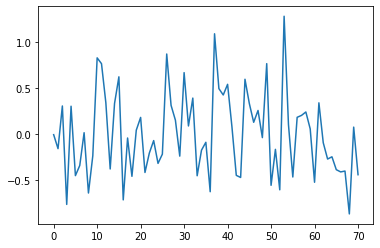

In [54]:
plt.plot(model.resid)

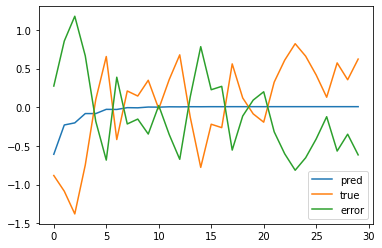

In [55]:

predict = model.predict(start=start, end=end)
# predict = - predict
plt.plot(predict, label='pred')
plt.plot(arma_test, label='true')
plt.plot(predict - arma_test, label='error')
plt.legend()